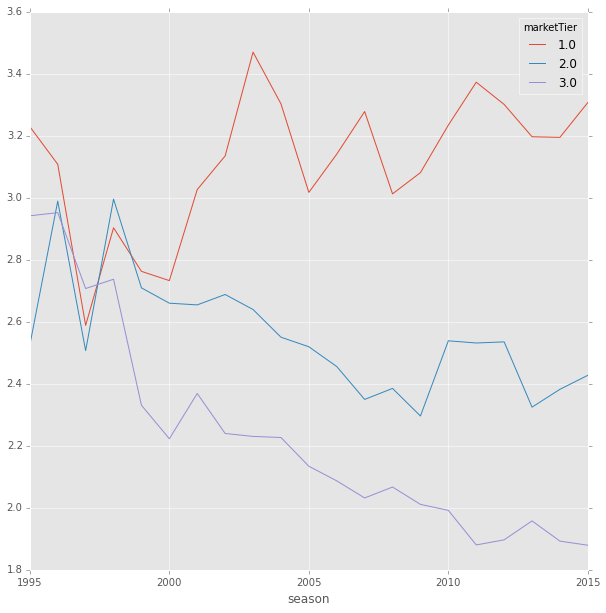

In [47]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromLeague.isin(leagueList))&(transfers.duration>0)]
s=s.merge(countryInfo[['marketTier']],right_index=True,left_on='fromCountry',how='left')
ss=s.groupby(['season','marketTier'])['duration']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

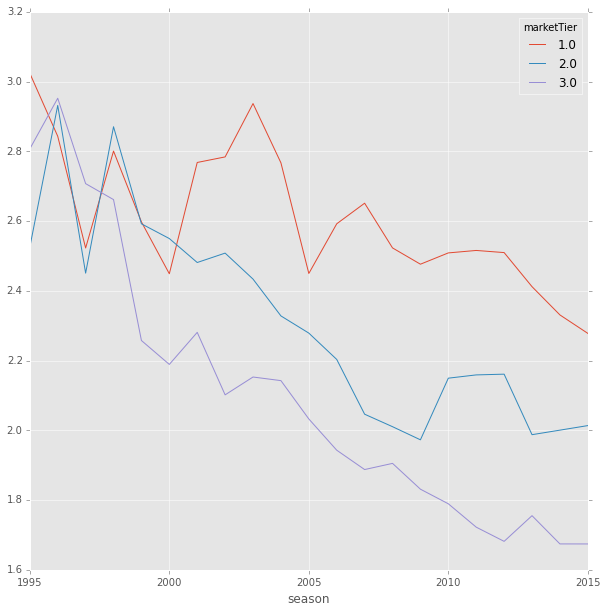

In [74]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromLeague.isin(leagueList))&(transfers.duration>0)]
s=s.merge(countryInfo[['marketTier']],right_index=True,left_on='fromCountry',how='left')
ss=s.groupby(['season','marketTier'])['durationWithLoans']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

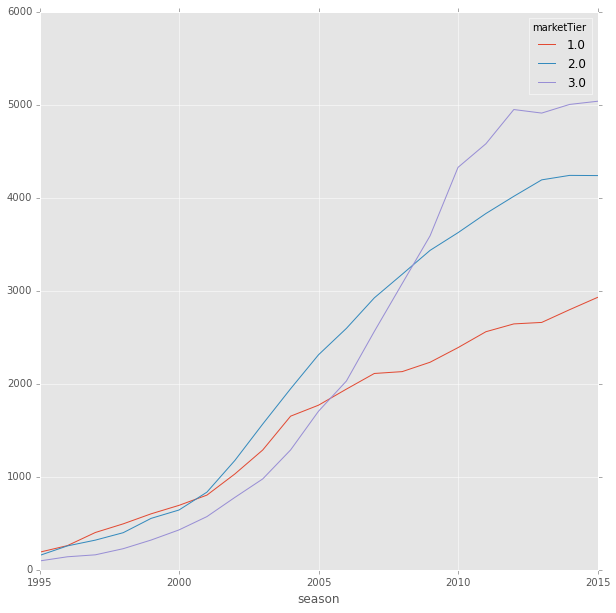

In [116]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)]
s=s.merge(countryInfo[['marketTier']],right_index=True,left_on='fromCountry',how='left')
ss=s.groupby(['season','marketTier'])['id']
(ss.count()).unstack().plot.line(figsize=(10,10))

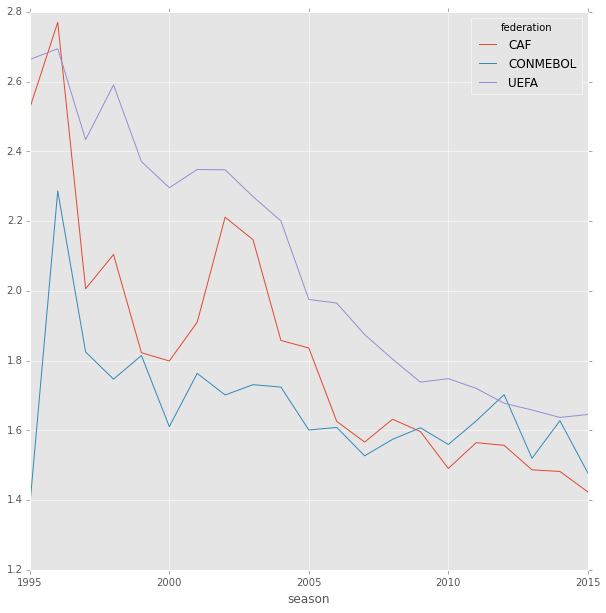

In [75]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)]
s=s.merge(countryInfo[['federation']],right_index=True,left_on='Nationality',how='left')
ss=s[s.federation.isin(['UEFA','CAF','CONMEBOL'])].groupby(['season','federation'])['durationWithLoans']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

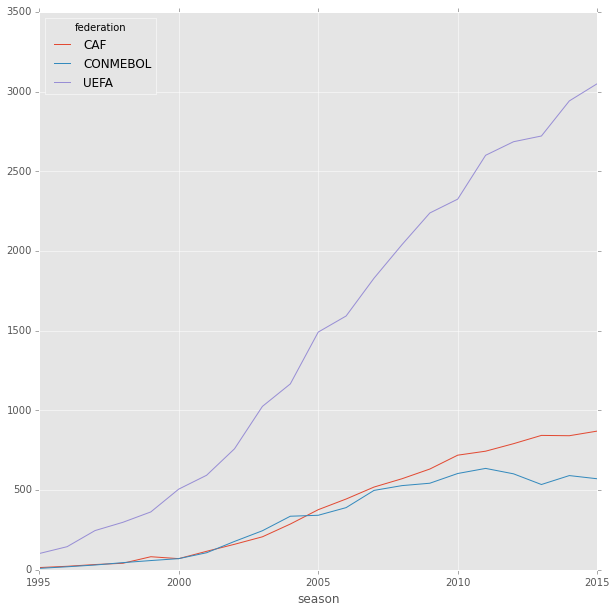

In [114]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)&(transfers.fromCountry!=transfers.Nationality)]
s=s.merge(countryInfo[['federation']],right_index=True,left_on='Nationality',how='left')
ss=s[s.federation.isin(['UEFA','CAF','CONMEBOL'])].groupby(['season','federation'])['id']
(ss.count()).unstack().plot.line(figsize=(10,10))

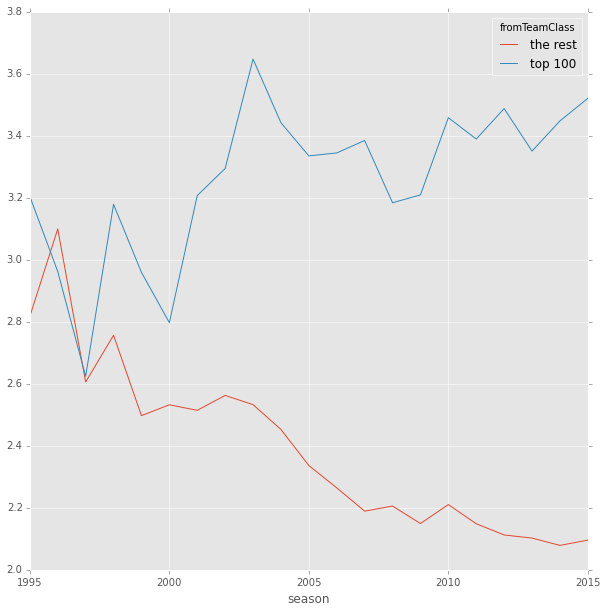

In [77]:
transfers['fromTeamClass']=pd.Series(np.where(transfers.fromTeamId.isin(top100clubids),'top 100','the rest'))
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromLeague.isin(leagueList))&(transfers.duration>0)]
ss=s.groupby(['season','fromTeamClass'])['duration']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

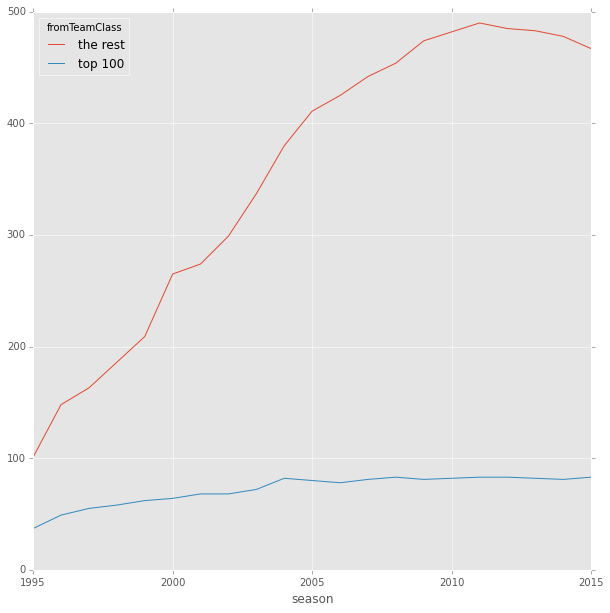

In [111]:
transfers['fromTeamClass']=pd.Series(np.where(transfers.fromTeamId.isin(top100clubids),'top 100','the rest'))
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromLeague.isin(leagueList))&(transfers.duration>0)]
ss=s.groupby(['season','fromTeamClass'])['fromTeamId']
(ss.nunique()).unstack().plot.line(figsize=(10,10))

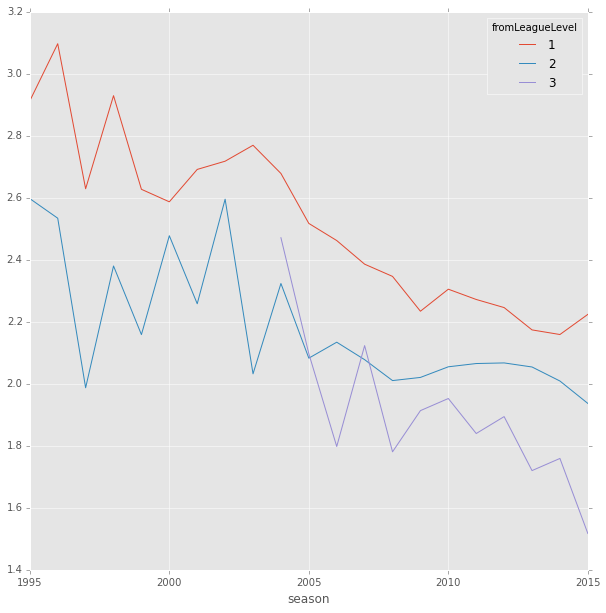

In [79]:
transfers['fromLeagueLevel']=transfers.fromLeague.str.slice(start=-1)
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)&transfers['fromLeagueLevel'].isin(['1','2','3'])]
ss=s.groupby(['season','fromLeagueLevel'])['duration']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

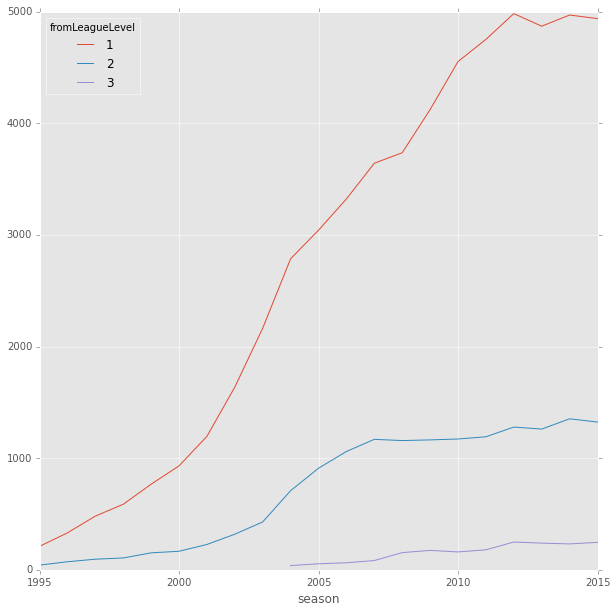

In [4]:
transfers['fromLeagueLevel']=transfers.fromLeague.str.slice(start=-1)
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)&transfers['fromLeagueLevel'].isin(['1','2','3'])]
ss=s.groupby(['season','fromLeagueLevel'])['id']
(ss.count()).unstack().plot.line(figsize=(10,10))

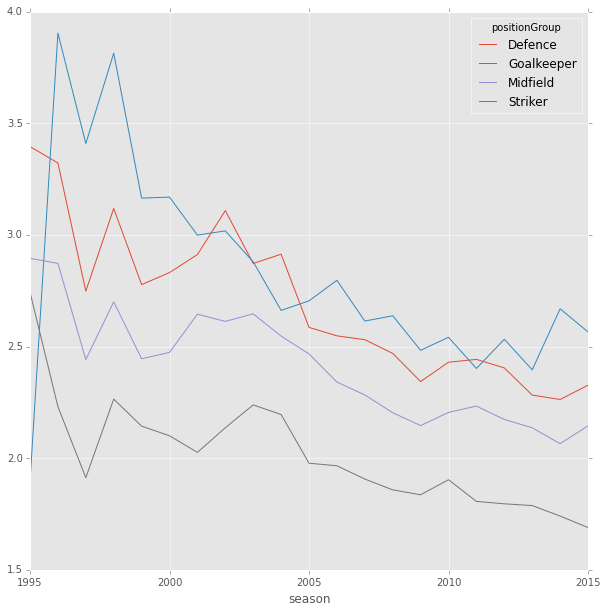

In [81]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)&transfers['fromLeagueLevel'].isin(['1','2','3','4'])]
ss=s.groupby(['season','positionGroup'])['duration']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


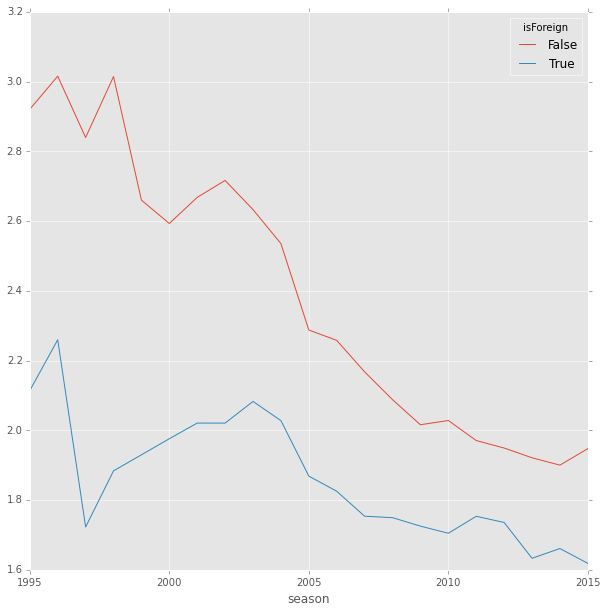

In [6]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)]
s['isForeign']=s.fromCountry!=s.Nationality
ss=s.groupby(['season','isForeign'])['duration']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


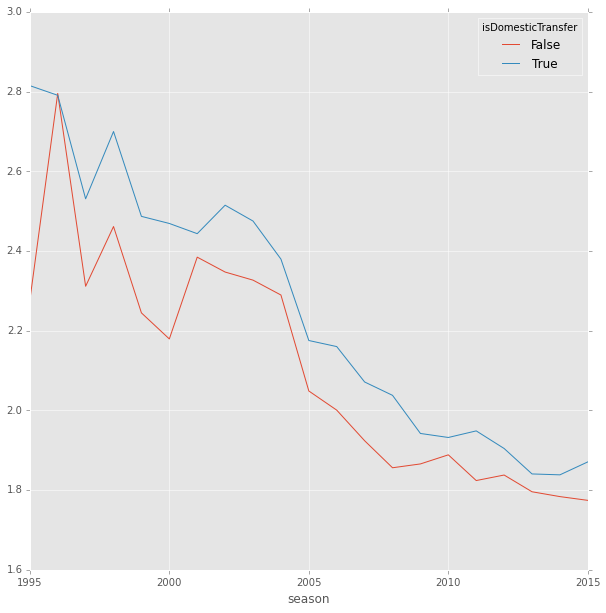

In [13]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)]
s['isDomesticTransfer']=s.fromCountry==s.toCountry
ss=s.groupby(['season','isDomesticTransfer'])['duration']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

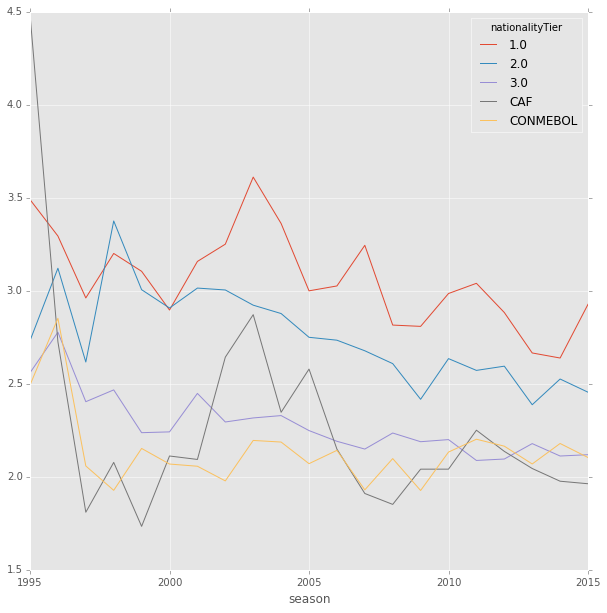

In [16]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.fromLeague.isin(leagueList))&(transfers.duration>0)]
s=s.merge(DataFrame({'nationalityTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='Nationality',right_index=True)
ss=s[s.nationalityTier.isin([1,2,3,'CAF','CONMEBOL'])].groupby(['season','nationalityTier'])['duration']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

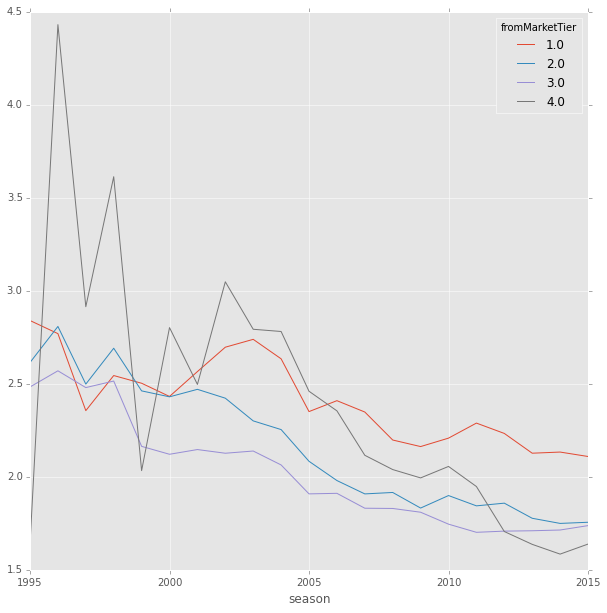

In [19]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)]
s=s.merge(DataFrame({'fromMarketTier':countryInfo.marketTier.fillna(countryInfo.federation)}),how='left',left_on='fromCountry',right_index=True)
ss=s.groupby(['season','fromMarketTier'])['duration']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

/Users/sunkevin/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


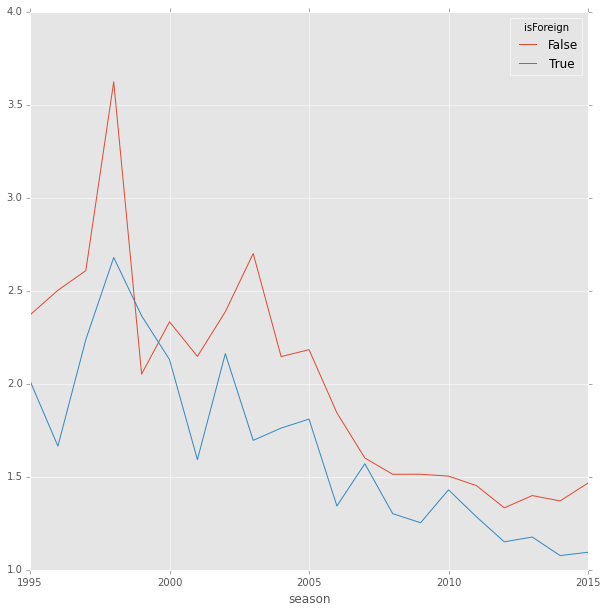

In [10]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)]
s['isForeign']=s.fromCountry!=s.Nationality
s2=s[s.fromCountry.isin(['Serbia','Croatia','Bosnia-Herzegovina'])]
#s2=s[s.fromCountry.isin(['Croatia'])]
ss=s2.groupby(['season','isForeign'])['duration']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

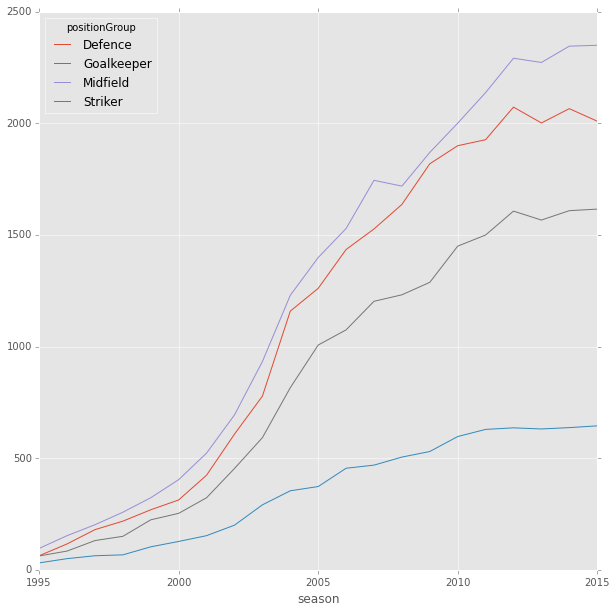

In [108]:
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)&transfers['fromLeagueLevel'].isin(['1','2','3','4'])]
ss=s.groupby(['season','positionGroup'])['id']
(ss.count()).unstack().plot.line(figsize=(10,10))

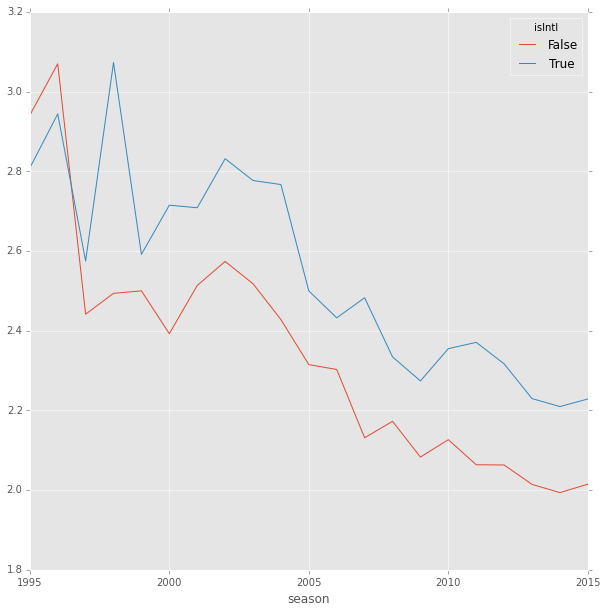

In [65]:
transfers['isIntl']=transfers['intlCaps']>0
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)&transfers['fromLeagueLevel'].isin(['1','2','3','4'])]
ss=s.groupby(['season','isIntl'])['duration']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

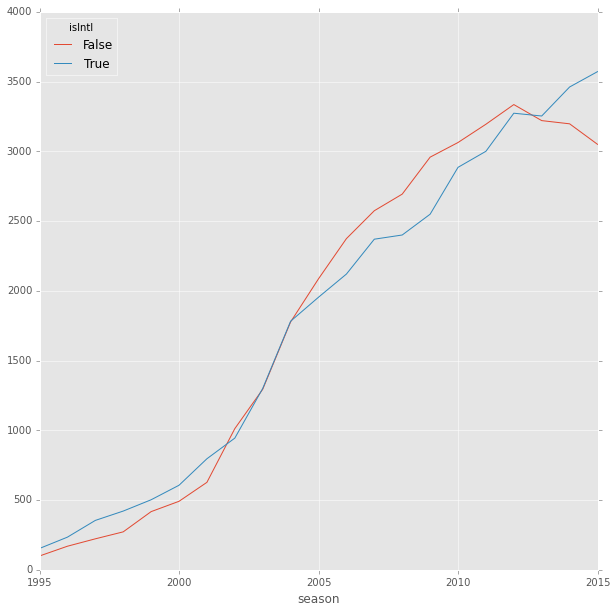

In [107]:
transfers['isIntl']=transfers['intlCaps']>0
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)&transfers['fromLeagueLevel'].isin(['1','2','3','4'])]
ss=s.groupby(['season','isIntl'])['id']
(ss.count()).unstack().plot.line(figsize=(10,10))

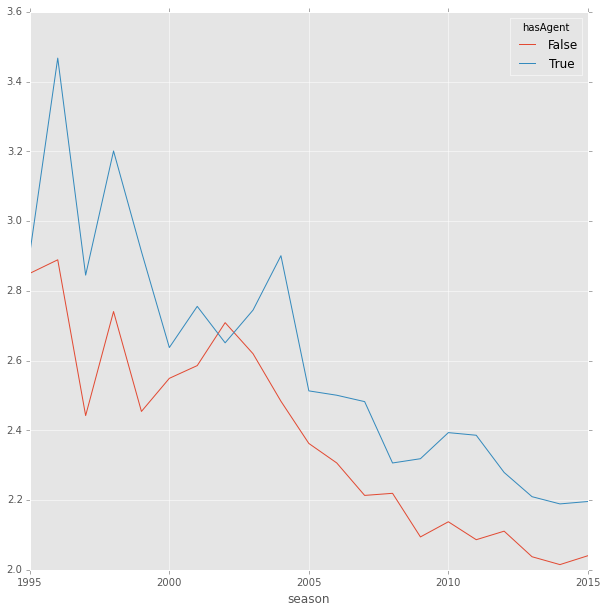

In [69]:
transfers['hasAgent']=(transfers['playersAgentId']>0)&(transfers['playersAgentId']!=96)
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)&transfers['fromLeagueLevel'].isin(['1','2','3','4'])]
ss=s.groupby(['season','hasAgent'])['duration']
(ss.describe()/366).unstack(level=0).swaplevel().ix['mean'].T.plot.line(figsize=(10,10))

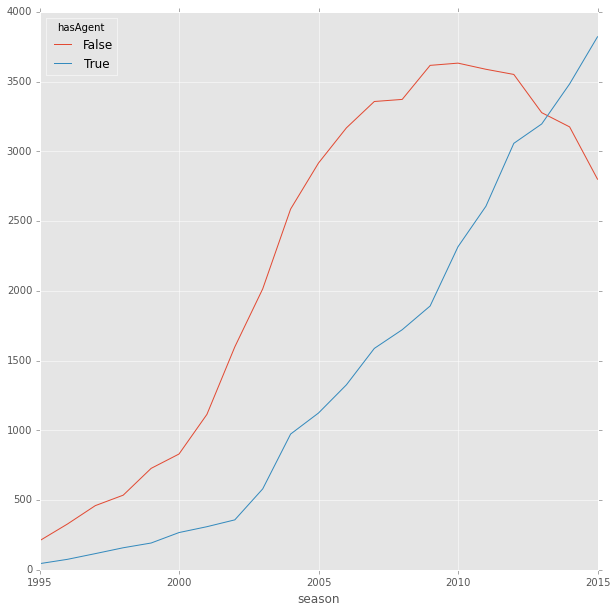

In [106]:
transfers['hasAgent']=(transfers['playersAgentId']>0)&(transfers['playersAgentId']!=96)
s=transfers[(transfers.age>23)&(transfers.season>1994)&(transfers.fromCountry.isin(uefa))&(transfers.duration>0)&transfers['fromLeagueLevel'].isin(['1','2','3','4'])]
ss=s.groupby(['season','hasAgent'])['id']
(ss.count()).unstack().plot.line(figsize=(10,10))

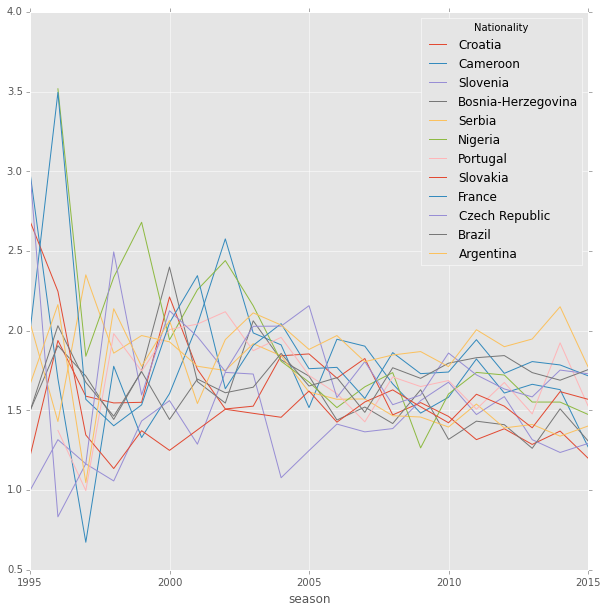

In [83]:
s=transfers[(transfers.age>21)&(transfers.season>1994)&(transfers.duration>0)&(transfers.fromCountry.isin(uefa))&(transfers.fromCountry!=transfers.Nationality)]
ss=s.groupby(['season','Nationality'])['duration']
i=(ss.describe()).unstack(level=0).swaplevel().ix['count'].sum(axis=1).sort_values()[-12:].index #.T   #.plot.line(figsize=(10,10))
s2=ss.describe().unstack(level=0).ix[i].swaplevel().ix['mean'].sort_values(2015).T
(s2/366).plot.line(figsize=(10,10))

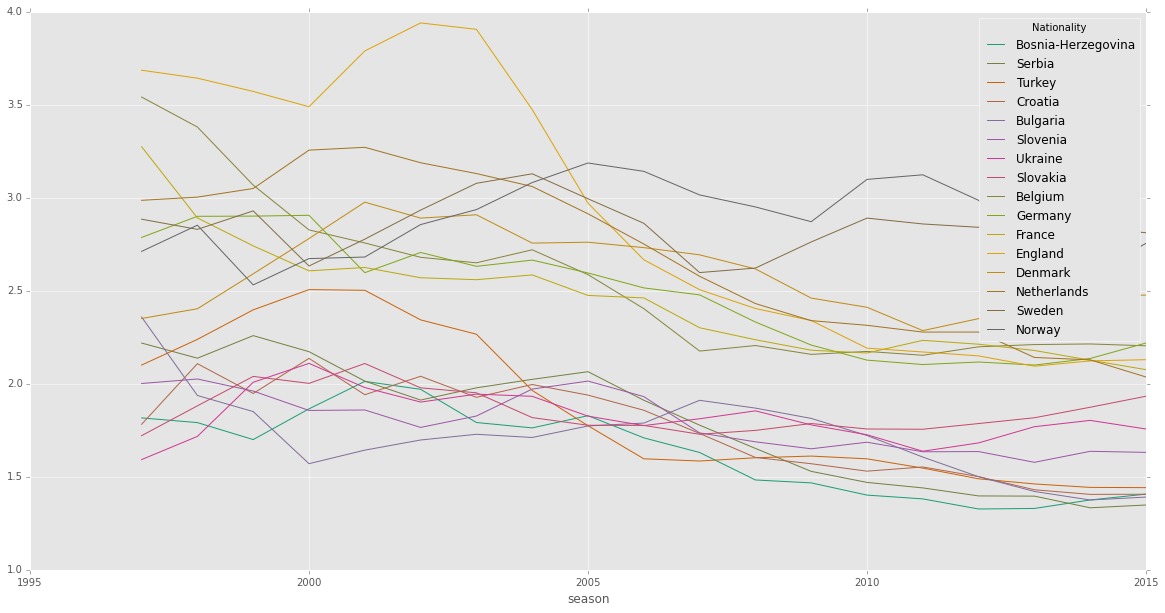

In [4]:
s=transfers[(transfers.age>21)&(transfers.season>1994)&(transfers.duration>0)&(transfers.fromCountry.isin(uefa))]
ss=s.groupby(['season','Nationality'])['duration']
i=(ss.describe()).unstack(level=0).swaplevel().ix['count'].sum(axis=1).sort_values()[-30:].index #.T   #.plot.line(figsize=(10,10))
s2=ss.describe().unstack(level=0).ix[i].swaplevel().ix['mean'].sort_values(2010)
s2=(pd.concat([s2.iloc[:8],s2.iloc[-8:]])).T
(s2/366).rolling(window=3,center=False).mean().plot.line(figsize=(20,10),colormap='Dark2')

In [17]:
nonloans.columns

Index([u'id', u'playerName', u'date', u'season', u'fromCountry', u'fromLeague',
       u'fromTeamId', u'fromTeamName', u'toCountry', u'toLeague', u'toTeamId',
       u'toTeamName', u'mv', u'fee', u'displayName', u'nameInHomeCountry',
       u'dateOfBirth', u'placeOfBirth', u'countryOfBirth', u'Age', u'Height',
       u'Nationality', u'nationality2', u'positionGroup', u'Position',
       u'mainPosition', u'sidePosition', u'Foot', u'nationalTeamId',
       u'intlCaps', u'intlGoals', u'playersAgent', u'playersAgentId',
       u'currentClub', u'currentClubId', u'inTheTeamSince', u'contractUntil',
       u'onLoanFrom', u'onLoanFromClubId', u'contractThereUntil', u'2ndClub',
       u'2ndClubId', u'completeName', u'contractOption',
       u'dateOfLastContractExtension', u'Glove', u'Outfitter', u'shoeModel',
       u'shoeSize', u'dayOfDeath', u'facebook', u'instagram', u'twitter',
       u'website', u'feeValue', u'isLoan', u'age', u'ageFloat', u'period',
       u'mvDelta', u'duration', u'durat

In [53]:
z=nonloans.merge(countryInfo[['Corruption']],right_index=True,left_on='fromCountry',how='left')

s=nonloans[(nonloans.facebook.notnull())|(nonloans.instagram.notnull())|(nonloans.twitter.notnull())|(nonloans.website.notnull())]
s=s.merge(countryInfo[['marketTier']],right_index=True,left_on='fromCountry',how='left')
s=s[(s.age>21)&(s.season>2000)&(s.duration>0)&(s.fromCountry.isin(uefa))&(s.id.isin(z[z.Corruption<50]['id'].drop_duplicates().tolist()))] #&(s.feeValue.notnull())]

s=s.groupby('id').agg({'duration':'mean','fromTeamId': 'count'}).rename(columns={'fromTeamId':'transferCount'})
z=s[s.transferCount>3].sort_values('duration').reset_index().merge(nonloans[['id','Nationality']].drop_duplicates(), how='left') 
#z[z.Nationality=='Germany']
z #[:300].groupby('Nationality')['id'].count().sort_values().plot.pie()
#.hist(bins=60,figsize=(20,10))

,id,duration,transferCount,Nationality
0,46407,186.571429,7,Croatia
1,59755,224.500000,4,Senegal
2,67451,231.166667,6,St. Kitts &Nevis
3,177331,233.500000,4,Croatia
4,41830,242.333333,12,Turkey
5,67064,246.250000,4,Costa Rica
6,62130,247.500000,8,Uganda
7,58380,249.000000,9,Slovenia
8,52487,259.083333,12,Turkey
9,72831,260.857143,7,Bosnia-Herzegovina


In [6]:
def avgAge(t):
    allIn=t[t.toLeague.isin(leagueList)].groupby('toCountry')['ageFloat'].mean().sort_values()
    allOut=t[t.fromLeague.isin(leagueList)].groupby('fromCountry')['ageFloat'].mean().sort_values()
    freeIn=t[t.toLeague.isin(leagueList)&(t.feeValue==0)].groupby('toCountry')['ageFloat'].mean().sort_values()
    freeOut=t[t.fromLeague.isin(leagueList)&(t.feeValue==0)].groupby('fromCountry')['ageFloat'].mean().sort_values()
    paidIn=t[t.toLeague.isin(leagueList)&(t.feeValue>0)].groupby('toCountry')['ageFloat'].mean().sort_values()
    paidOut=t[t.fromLeague.isin(leagueList)&(t.feeValue>0)].groupby('fromCountry')['ageFloat'].mean().sort_values()
    z=DataFrame({'all imports':allIn,'all exports':allOut,'free imports':freeIn,'free exports':freeOut,'paid imports':paidIn,'paid exports':paidOut}).sort_values('all imports')
    z=z[['all imports', 'all exports', 'paid imports', 'paid exports', 'free imports', 'free exports']]
    z.columns.name='average age'
    return z.reset_index().rename(columns={'index':'country'})

output=nonloans[(nonloans.fromCountry!=nonloans.toCountry)&(nonloans.season>2000)].groupby('period').apply(avgAge).unstack(level=0).swaplevel(axis=1).sort_index(axis=1,level=0)
output.to_excel('../data/analysis/average_age.xlsx')
output

period             (2000, 2005]                                       \
average age             country all imports all exports paid imports   
0                       Ireland   22.409149   23.529703    23.973114   
1                     Lithuania   23.829230   23.703737    20.531565   
2                   Netherlands   23.860759   26.440232    22.631212   
3                       Belgium   23.941876   25.433670    23.640985   
4                         Italy   24.095842   27.364584    24.095550   
5                       Ukraine   24.148060   25.964625    22.266673   
6                   Switzerland   24.224945   25.476489    24.863078   
7                       Finland   24.267914   26.184582    21.514473   
8            Bosnia-Herzegovina   24.382172   24.302822    23.195548   
9                    Kazakhstan   24.387747   26.002511    25.632285   
10               Czech Republic   24.447384   25.774304    23.630875   
11                       Serbia   24.514504   24.165868    22.276068   
12                      England   24.537455   27.843669    23.953204   
13                       France   24.566698   26.307493    23.308859   
14                       Russia   24.611994   26.930195    23.927922   
15                       Israel   24.626967   26.219730    24.441296   
16                   Luxembourg   24.720274   28.542516          NaN   
17                       Sweden   24.787623   25.967872    24.235953   
18                     Portugal   24.924613   27.571309    23.112042   
19                      Croatia   25.077151   25.980850    23.056828   
20                     Slovenia   25.161065   26.145761    19.892263   
21                        Spain   25.163496   28.838216    24.007526   
22                       Turkey   25.167983   27.337123    25.016186   
23                        Malta   25.192212   26.565182          NaN   
24                     Bulgaria   25.205987   25.944442    23.664415   
25                       Norway   25.250481   26.943487    25.747379   
26                     Scotland   25.263673   27.512516    25.100966   
27                      Denmark   25.284908   26.967039    25.336983   
28                      Germany   25.320799   29.129799    24.634123   
29                United States   25.411523   26.151092    23.788305   
30                   Azerbaijan   25.425437   24.327502    25.479647   
31                       Poland   25.554409   26.411950    23.381204   
32                       Greece   25.584299   27.598946    24.797881   
33                      Romania   25.852072   27.006314    25.225022   
34                     Slovakia   25.917202   25.579139    25.396825   
35                      Hungary   25.930146   27.370762    23.835827   
36                      Austria   26.390614   27.639546    25.199774   
37                       Cyprus   27.849420   28.504249    22.665421   

period                                                    (2005, 2010]  \
average age paid exports free imports free exports             country   
0              20.932212    22.034243    24.249414             Ireland   
1              20.992217    23.684887    23.924329               Italy   
2              25.085274    24.584446    25.599119             Belgium   
3              24.115485    23.573580    24.786286             England   
4              25.825943    24.927842    27.510049  Bosnia-Herzegovina   
5              24.455594    24.702988    26.234762              Russia   
6              23.980625    24.379445    25.600939             Finland   
7              22.338583    24.571632    25.180812            Portugal   
8              22.997392    24.360264    23.642983          Luxembourg   
9                    NaN    23.913918    23.435571              Sweden   
10             23.983697    25.135184    26.623009              Norway   
11             22.795219    24.913908    24.097415             Germany   
12             25.649321    25.646439    27.253574         Netherlands   
13       

In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from urllib2 import urlopen, Request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import numpy as np
import re
import os.path 
import datetime 
import math
import matplotlib.pyplot as plt

transfers = pd.read_csv('../data/merged/transfers_q.csv')
loans = pd.read_csv('../data/merged/loans.csv')
nonloans = pd.read_csv('../data/merged/nonloans.csv')
players=pd.read_csv('../data/merged/players.csv')

leagueCodeMapping = {'GB1':'Premier League (England)','FR1':'Ligue 1 (France)',
                                                         'ES1':'La Liga (Spain)','IT1':'Serie A (Italy)','L1':'Bundesliga (Germany)',
                                                         'PO1':'Primeira Liga (Portugal)','NL1':'Eredivisie (Netherlands)'}

teamIdMap = pd.concat([transfers[['toTeamId','toTeamName','season']].rename(columns={'toTeamId':'teamId','toTeamName':'teamName'}),
    transfers[['fromTeamId','fromTeamName','season']].rename(columns={'fromTeamId':'teamId','fromTeamName':'teamName'})],ignore_index=True) \
    .sort_values('season',ascending=False).drop_duplicates('teamId').set_index('teamId')['teamName'].to_dict()
    
agentIdMap = transfers[['playersAgentId','playersAgent']].sort_values('playersAgent',ascending=False).drop_duplicates('playersAgentId').set_index('playersAgentId')['playersAgent'].to_dict()

leagueList = ['GB1','ES1','L1','IT1','FR1','PO1','NL1','TR1','RU1','BE1','MLS1','UKR1','GR1','RO1','ZYP1','KR1','SER1','BOS1','BU1','DK1','SE1','NO1','LI1','SC1','ISR1','PL1','UNG1','A1','C1','MAL1','KAS1','TS1','SLO1','SL1','FI1','LUX1','AZ1','IR1']

countryInfo=pd.read_excel('../data/reference/countries.xls').set_index('country')
countryInfo.marketTier=np.where(countryInfo.marketTier==4,3,countryInfo.marketTier)

top20clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:20].index
top50clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:50].index
top100clubids=transfers.groupby('toTeamId')[['feeValue']].sum().merge(DataFrame({'teamName':teamIdMap}), left_index=True,right_index=True,how='left').sort_values('feeValue',ascending=False).iloc[:100].index

uefa=countryInfo[countryInfo.federation=='UEFA'].index
caf=countryInfo[countryInfo.federation=='CAF'].index
concacaf=countryInfo[countryInfo.federation=='CONCACAF'].index
concacaf_no_uscan=countryInfo[countryInfo.federation=='CONCACAF'].drop(['United States','Canada']).index
conmebol=countryInfo[countryInfo.federation=='CONMEBOL'].index
afc=countryInfo[countryInfo.federation=='AFC'].index
afc_no_anzac=countryInfo[countryInfo.federation=='AFC'].drop(['Australia','New Zealand']).index

country_coeff=pd.read_table('../data/reference/country_coefficient.csv').reset_index(drop=True)
country_coeff.columns=['Movement','Country','2012 coeff','2013 coeff','2014 coeff','2015 coeff','2016 coeff','Total coeff','Teams Total','CL','EL','Total']
country_coeff=country_coeff.drop(['Movement','2016 coeff','CL','EL','Total','Teams Total','Total coeff'],axis=1)
country_coeff['Country']=country_coeff['Country'].str.split('\(L',expand=True)[0].str.strip()
country_coeff=country_coeff.set_index('Country')
country_coeff = country_coeff.join(DataFrame({'total coeff':country_coeff.sum(axis=1)}))

natteam_coeff=pd.read_table('../data/reference/national_team_coefficient.csv').reset_index(drop=True).drop('Rank',axis=1)
natteam_coeff['Country']=natteam_coeff['Country'].str.strip()
natteam_coeff.Coefficient=natteam_coeff.Coefficient.apply(lambda s: int(s.replace(',','')))
natteam_coeff=natteam_coeff.rename(columns={'Coefficient':'National team coeff'}).set_index('Country')

club_coeff=pd.read_table('../data/reference/club_coefficient.csv').reset_index(drop=True).set_index('Club')
club_coeff=club_coeff.drop(['2017','2016','Mvmt','Total'],axis=1)
club_coeff.Association = club_coeff.Association.str.split(expand=True)[0]
# sanity check: club_coeff.merge(DataFrame({'Team Name':teamIdMap}),how='left',left_on='Team Id',right_index=True)
club_coeff=club_coeff.reset_index().set_index('Team Id').rename(columns=lambda c: 'Club coeff ' + c.split('–')[0] if '–' in c else c)

gdp=pd.read_table('../data/reference/country_gdp.csv').reset_index(drop=True).drop('2014 Rank',axis=1).rename(columns={'Country ':'Country'})
gdp.Country=gdp.Country.str.strip()
gdp=gdp.set_index('Country')
gdp.columns=['GDP '+c for c in gdp.columns.str.strip()]
for column in gdp.columns:
    gdp[column]=gdp[column].apply(lambda s: float(str(s).replace(',','')))
    
unemployed=pd.read_table('../data/reference/country_unemployment.csv').drop(['Date','Employment rate'],axis=1)
unemployed.columns=['Country','Unemployment']
unemployed['Country']=unemployed['Country'].str.split(' ').apply(lambda arr: ' '.join(arr[:len(arr)/2]))
unemployed=unemployed.set_index('Country').rename(index={'United Kingdom':'England'})

corruption=pd.read_table('../data/reference/country_corruption.csv').drop(['Rank'],axis=1)
corruption.Country=corruption.Country.str.strip()
corruption=corruption.set_index('Country')
corruption=corruption[corruption.columns[:1]].rename(columns={'2015 score':'Corruption'}).rename(index={'United Kingdom':'England'})

population=pd.read_table('../data/reference/country_population.csv').drop(['Rank'],axis=1)
population.columns=population.columns.str.strip()
population.Country=population.Country.str.split('[',expand=True)[0].str.strip()
population['Population']=population['Population'].apply(lambda s: float(str(s).replace(',','')))
population=population[['Country','Population','Growth %']].set_index('Country').rename(index={'United Kingdom':'England'})

barometer=pd.read_table('../data/reference/country_corruption_barometer.csv').reset_index(drop=True)
barometer.columns=['Corruption Rank','Country','Bribe %']
barometer.Country=barometer.Country.str.strip()
barometer=barometer.set_index('Country').rename(index={'United Kingdom':'England'})

countryInfo=natteam_coeff.join(country_coeff).join(gdp).join(unemployed).join(corruption).join(population).join(countryInfo).join(barometer)